In [147]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np 

In [148]:
class ThresholdSwitch():
    def __init__(self,  R_off: float = 10_000_000_000, R_on: float = 10_000, V_th: float = 0.3, V_hold: float = 0.05) -> None:
        self.R_off = R_off 
        self.R_on = R_on
        self.V_th = V_th
        self.V_hold = V_hold
        self.state = 'off'

    def get_resistance(self, voltage: float):
        if (self.state == 'off') and ((voltage) < self.V_th):
            return self.R_off
        elif (self.state == 'off') and ((voltage) > self.V_th):
            self.state = 'on'
            return self.R_on
        elif (self.state == 'on') and ((voltage) > self.V_hold):
            return self.R_on
        elif (self.state == 'on') and ((voltage) < self.V_hold):
            self.state = 'off'
            return self.R_off

In [173]:
time = np.linspace(0, 10, 10000000)
dt = time[1] - time[0]
ts = ThresholdSwitch(V_hold=0.05, V_th=0.4, R_off=5e10, R_on=3e4)

E = 1
R_r = 1e6
C = 1e-10
R_ts = [ts.get_resistance(0)]
U_ts = [0]
I_ts = [0]
I_C = [0]
I = [0]

for i in range(1, len(time)):
    I.append(E / (R_r + R_ts[i-1]))
    U_ts.append((I[i] - U_ts[i-1] / R_ts[i-1]) * dt/C + U_ts[i-1])
    R_ts.append(ts.get_resistance(U_ts[i]))
    I_ts.append(U_ts[i] / R_ts[i])


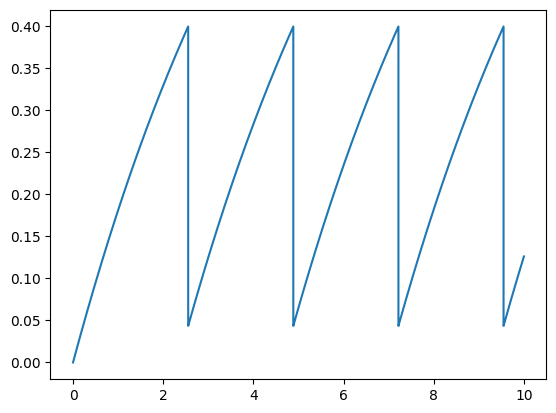

In [194]:
plt.plot(time, U_ts)
#plt.xlim([2.55419,2.55421])
#plt.yscale('log')

In [ ]:
t = np.linspace(0, 10, 10000)
dt = t[1] - t[0]
I_inj = 1e-7
V_0 = 0.1
ts = ThresholdSwitch(V_hold=0.01, V_th=0.4, R_off=5e10, R_on=3e4)
R_m = [ts.get_resistance(0)]
C_m = 1e-6
V = [0]
r = [ts.get_resistance(0)]
for i in range(len(t)-1):
    V.append((I_inj - (V[i] - V_0) / ts.get_resistance(V[i] - V_0)) * dt / C_m + V[i])
    r.append(ts.get_resistance(V[i] - V_0))

I_r = np.array(V) / np.array(r)